# Jupyter Cells

### Code

In [1]:
temperature = 25

In [2]:
print(temperature)

25


In [4]:
import numpy as np
np.arange?

### Markdown Cells

Markdown 利用简单的语法来创建格式化的文字内[语法参考](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)


<font face="黑体"> 我是黑体字 </font>
<font face="微软雅黑"> 我是微软雅黑 </font>
<font face="STCAIYUN">我是华文彩云</font>

**This text will be bold**
*This text will be in italics*

# Heading
## Sub-Heading
### Subsub-Heading
#### Subsubsub-Heading
##### Subsubsubsub-Heading

* This is an unordered list
* It is useful for many things
    * Grocery lists
    * Plans to take over the world
        * Large plans may require multiple lists

> I was born not knowing and have had only a little time to
> change that here and there.
> \- Richard P. Feynman


```python
import time 

for i in range(10, 0, -1):
    print(i)
    time.sleep(1)
print("Blast off!")
```

| Date | Max Temp | Min Temp |
| ---- | -------- | -------- |
| 4/12 | 75       | 65       |
| 4/13 | 80       | 68       |
| 4/14 | 68       | 50       |

$$\left( \frac{Dv}{Dt} \right) = -2 \Omega u \text{sin}\phi - \frac{u^2}{a} \text{tan}\phi$$

# Jupyter widget - ipyleaflet

In [7]:
from ipyleaflet import Map, Velocity, TileLayer, basemaps
import xarray as xr

In [8]:
center = [44.33956524809713, -130.60546875000003]
zoom = 3
m = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': …

In [9]:
import os

if not os.path.exists('wind-global.nc'):
    url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
    import requests
    r = requests.get(url)
    wind_data = r.content
    with open('wind-global.nc', 'wb') as f:
        f.write(wind_data)

In [10]:
ds = xr.open_dataset('wind-global.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    u_wind   (lat, lon) float64 ...
    v_wind   (lat, lon) float64 ...
Attributes:
    centerName:      US National Weather Service - NCEP(WMC)
    disciplineName:  Meteorological products
    refTime:         2016-04-30T06:00:00.000Z

In [11]:
display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}
wind = Velocity(
    data=ds, 
    zonal_speed='u_wind', meridional_speed='v_wind', 
    latitude_dimension='lat', longitude_dimension='lon', 
    velocity_scale=0.01, max_velocity=20, 
    display_options=display_options
)
m.add_layer(wind)

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# dk_met libraries

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs
from dk_met_io.retrieve_micaps_server import get_model_grid
from dk_met_graphics.plot.china_map import add_china_map_2cartopy
from dk_met_graphics.cmap.ctables import cm_qpf_nws, cm_rain_nws
from dk_met_graphics.cmap.cm import show_colormap
%matplotlib inline

In [19]:
get_model_grid?

In [4]:
filename = "18122420.156"
data = get_model_grid('ECMWF_HR/RAIN24/', filename=filename)

In [5]:
data

<xarray.DataArray 'data' (time: 1, lat: 721, lon: 1441)>
array([[[0.015259, 0.030518, ..., 0.396729, 0.38147 ],
        [0.045776, 0.030518, ..., 0.396729, 0.396729],
        ...,
        [0.045776, 0.076294, ..., 7.720947, 8.178711],
        [0.      , 0.030518, ..., 7.598877, 7.568359]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2018-12-31T08:00:00
  * lat        (lat) float64 80.0 79.88 79.75 79.63 ... -9.75 -9.875 -10.0
  * lon        (lon) float64 0.0 0.125 0.25 0.375 ... 179.6 179.8 179.9 180.0
    init_time  (time) datetime64[ns] 2018-12-24T20:00:00
    fhour      (time) float64 156.0
Attributes:
    data_directory:  ECMWF_HR/RAIN24/
    data_filename:   18122420.156
    organization:    Created by NMC.

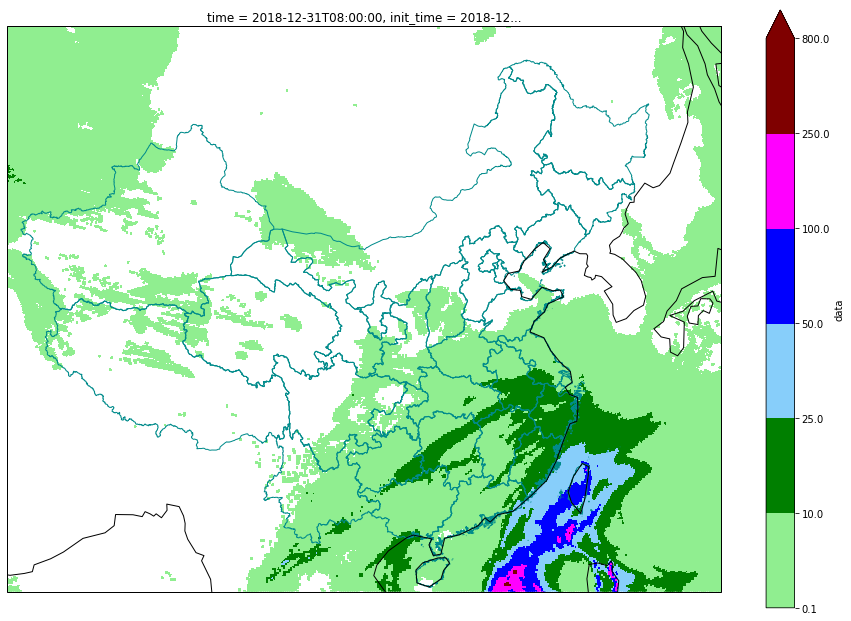

In [18]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((80, 130, 18, 55),crs=datacrs)
add_china_map_2cartopy(ax, name='province', edgecolor='darkcyan', lw=1)
cmap, norm = cm_rain_nws(atime=24)
data.isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap, extend='max')
ax.coastlines()
plt.show()

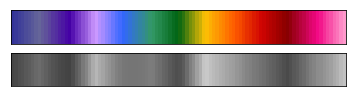

In [28]:
def sftemp():
    sfc_cdict ={'red':    ((0.00, 0.20, 0.20),
                (0.08, 0.40, 0.40),
                (0.17, 0.27, 0.27),
                (0.25, 0.80, 0.80),
                (0.33, 0.20, 0.20),
                (0.42, 0.20, 0.20),
                (0.50, 0.00, 0.00),
                (0.58, 0.99, 0.99),
                (0.67, 1.00, 1.00),
                (0.75, 0.82, 0.82),
                (0.83, 0.53, 0.53),
                (0.92, 0.95, 0.95),
                (1.00, 1.00, 1.00)),

        'green':    ((0.00, 0.20, 0.20),
                (0.08, 0.40, 0.40),
                (0.17, 0.00, 0.00),
                (0.25, 0.60, 0.60),
                (0.33, 0.40, 0.40),
                (0.42, 0.60, 0.60),
                (0.50, 0.39, 0.39),
                (0.58, 0.76, 0.76),
                (0.67, 0.36, 0.36),
                (0.75, 0.02, 0.02),
                (0.83, 0.00, 0.00),
                (0.92, 0.03, 0.03),
                (1.00, 0.60, 0.60)),

        'blue':        ((0.00, 0.60, 0.60),
                (0.08, 0.60, 0.60),
                (0.17, 0.65, 0.65),
                (0.25, 1.00, 1.00),
                (0.33, 1.00, 1.00),
                (0.42, 0.40, 0.40),
                (0.50, 0.07, 0.07),
                (0.58, 0.02, 0.02),
                (0.67, 0.00, 0.00),
                (0.75, 0.01, 0.01),
                (0.83, 0.00, 0.00),
                (0.92, 0.52, 0.52),
                (1.00, 0.80, 0.80))}

     
    sfc_coltbl = LinearSegmentedColormap('SFC_COLTBL',sfc_cdict)
    return sfc_coltbl       

cmap = sftemp()
show_colormap(cmap)

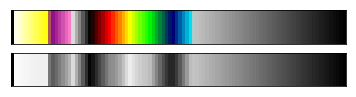

In [31]:
cdict  = {'red': ((0.0, 0.0, 0.0),
                 (.001, 1.00, 1.00),
                 (.107, 1.00, 1.00),
                 (.113, 0.498, 0.498),
                 (.173, 1.00, 1.00),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.902, 0.902),
                 (.293, 1.00, 1.00),
                 (.346, 1.00, 1.00),
                 (.352, 1.00, 1.00),
                 (.406, 0.101, 0.101),
                 (.412, 0.00, 0.00),
                 (.481, 0.00, 0.00),
                 (.484, 0.00, 0.00),
                 (.543, 0.00, 0.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                 (.001, 1.00, 1.00),
                 (.107, 1.00, 1.00),
                 (.113, 0.00, 0.00),
                 (.173, 0.498, 0.498),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.00, 0.00),
                 (.293, 0.00, 0.00),
                 (.346, 0.902, 0.902),
                 (.352, 1.00, 1.00),
                 (.406, 1.00, 1.00),
                 (.412, 1.00, 1.00),
                 (.481, 0.00, 0.00),
                 (.484, 0.00, 0.00),
                 (.543, 1.00, 1.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                   (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.00, 0.00),
                 (.001, 1.00, 1.00),
                 (.107, 0.00, 0.00),
                 (.113, 0.498, 0.498),
                 (.173, 0.786, 0.786),
                 (.179, 0.902, 0.902),
                 (.227, 0.102, 0.102),
                 (.233, 0.00, 0.00),
                 (.287, 0.00, 0.00),
                 (.293, 0.00, 0.00),
                 (.346, 0.00, 0.00),
                 (.352, 0.00, 0.00),
                 (.406, 0.00, 0.00),
                 (.412, 0.00, 0.00),
                 (.481, 0.451, 0.451),
                 (.484, 0.451, 0.451),
                 (.543, 1.00, 1.00),
                 (.546, 0.773, 0.773),
                 (.994, 0.012, 0.012),
                 (.997, 0.004, 0.004),
                  (1.0, 0.0, 0.0))}

import matplotlib as mpl
my_cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,2048)

# This is assuming that the data you are plotting are actual brightness temps, 
# not indexed 0-255 like the old GOES products

#Assuming that you have created axes on your plot "ax", and
# a[:] contains the array of brightness temps, row 1 is at the northern boundary,
# and xa and ya contain the x and y info in sterradians, I think, then

show_colormap(my_cmap)